Test Input Shape: (100, 30, 14)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

--- FINAL TEST RESULTS ---
RMSE: 14.65 cycles
MAE:  10.62 cycles


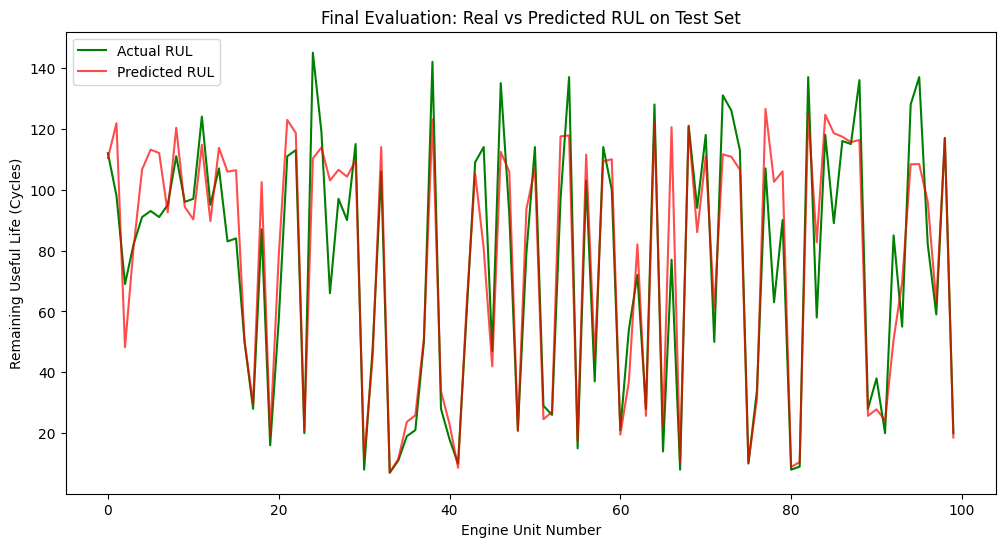

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import load_model

sys.path.append(os.path.abspath('../src'))
from data_process import load_data, scale_data, SELECTED_FEATURES

# 1. Load Data & Model
TRAIN_PATH = '../data/train_FD001.txt'
TEST_PATH = '../data/test_FD001.txt'
RUL_PATH = '../data/RUL_FD001.txt'
MODEL_PATH = '../models/lstm_rul_v1.h5'

train_df, test_df, rul_truth = load_data(TRAIN_PATH, TEST_PATH, RUL_PATH)

train_df, test_df, scaler = scale_data(train_df, test_df)
model = load_model(MODEL_PATH, compile=False)

# 2. Prepare Test Data (Last Sequence Strategy)
sequence_length = 30
x_test = []
y_true = rul_truth['RUL'].values 

test_units = test_df['unit_nr'].unique()

for unit in test_units:
    temp_df = test_df[test_df['unit_nr'] == unit]
    
    if len(temp_df) >= sequence_length:
        last_seq = temp_df[SELECTED_FEATURES].values[-sequence_length:]
        x_test.append(last_seq)
    else:
        pass

x_test = np.array(x_test)
print("Test Input Shape:", x_test.shape)

# 3. Make Predictions
y_pred = model.predict(x_test)

# 4. Evaluate
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"\n--- FINAL TEST RESULTS ---")
print(f"RMSE: {rmse:.2f} cycles")
print(f"MAE:  {mae:.2f} cycles")

# 5. Visualization (Prediction vs Truth)
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual RUL', color='green')
plt.plot(y_pred, label='Predicted RUL', color='red', alpha=0.7)
plt.title('Final Evaluation: Real vs Predicted RUL on Test Set')
plt.xlabel('Engine Unit Number')
plt.ylabel('Remaining Useful Life (Cycles)')
plt.legend()
plt.show()